# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import merged data

In [2]:
path = r'C:\Users\justi\OneDrive\Documents\Career foundry\Data Immersion 4'

In [4]:
df_ic = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merged.pkl'))

In [5]:
df_ic.shape

(32404859, 33)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df_ic.head()

,order_id,user_id,order_num_of_customer,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,purchase_price,spending_flag,median_purchase,order_fr_flag,first_name,last name,sex,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Visuals

## Histogram

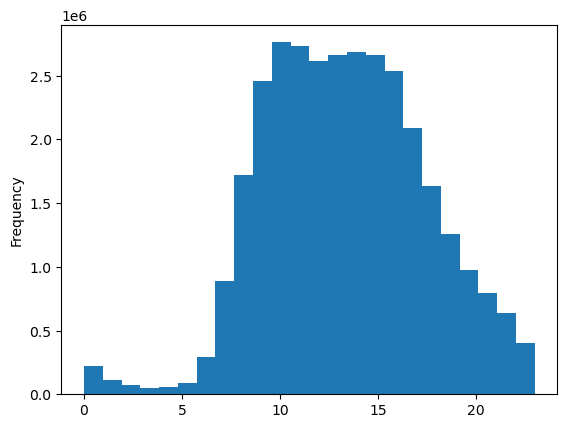

In [16]:
hist_hour = df_ic['order_hour_of_day'].plot.hist(bins = 24)

## This histogram shows the frequency of shoppers throughout each hour of the day. The first 7 hours of the day there is not much activity. After that it picks up and peaks between 9 and 16 then steadily declines until the end of the day. 

## Bar chart

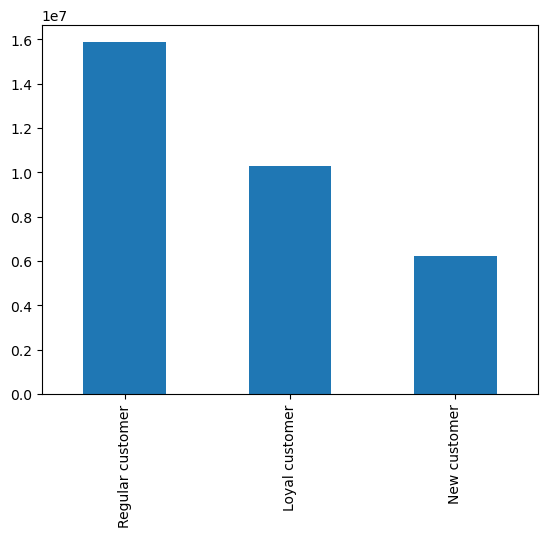

In [27]:
bar_1 = df_ic['loyalty_flag'].value_counts().plot.bar()

## line chart

In [9]:
np.random.seed(4)
dev = np.random.rand(len(df_ic)) <= 0.7

In [10]:
big = df_ic[dev]
small = df_ic[~dev]

In [11]:
len(df_ic)

32404859

In [18]:
len(big) + len(small)

32404859

In [19]:
df_2 = small[['order_hour_of_day','prices']]

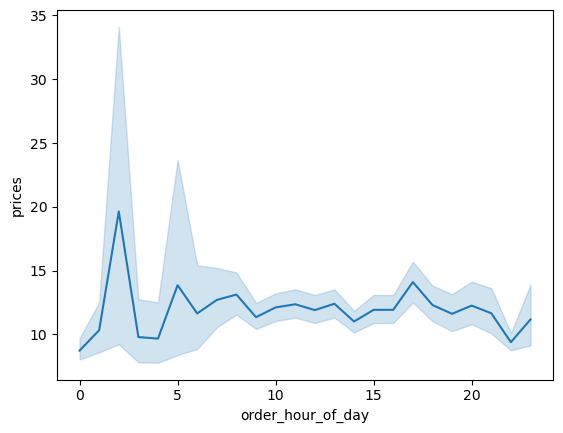

In [20]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [23]:
df_line_2 = small[['age', 'n_dependants']]

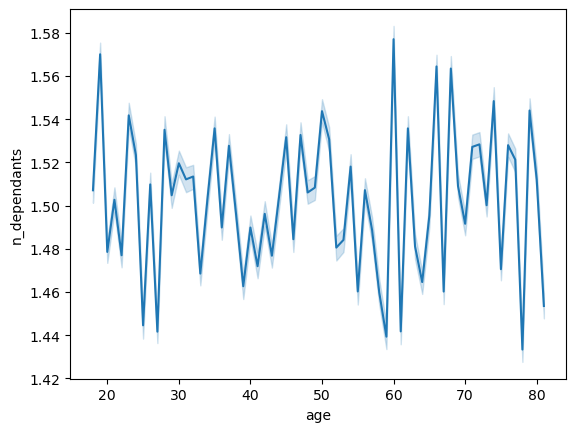

In [24]:
line_3 = sns.lineplot(data = df_line_2, x = 'age', y = 'n_dependants')

## This line chart shows the correlation between age and the number of dependants in a family. However, there is no real correlation as the number of dependents fluctuates quite a bit between most age groups. It is interesting that the number of dependants for 19 year old individuals is very hight and then drops off very low at 20 years old. Another interesting observation is the high number of dependants at age 60 when ages 59 and 61 are very low compared to the rest of the age groups. There is also an upward trend from ages 40 to 50. While these is no difinitive correlation these insights can still hint at spending habits.

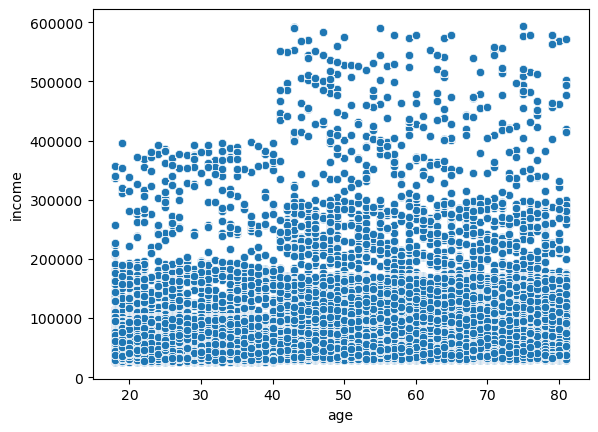

In [31]:
scat = sns.scatterplot(x = 'age', y = 'income',data = df_ic)

## This scatterplot shows the majority of income falls under the 200,000 mark, with a minority of individuals under 40 years old earning up to but no more than 400,000. After the 40 year old mark there is a considerable more amount of earners falling into the 200,000 - 300,000 income range with a minority of individuals earning up to 600,000.

In [26]:
hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_frequency_hist.png'))

In [28]:
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_loyalty_bar.png'))

In [29]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Hour_prices_line.png'))

In [30]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dep_line.png'))

In [32]:
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_scat.png'))